# alpha使用例子

In [4]:
%matplotlib inline
from FreeBack import alpha,post
import numpy as np
import pandas as pd
import copy

# 读取转债数据

In [5]:
def read_pkl(filename):
    import pickle
    with open(filename,'rb') as file:
        a = pickle.load(file)
        return a
    
market_convertible = read_pkl('market.pkl')['2020':]

In [6]:
# 要求20日平均成交额大于100w，正股非ST，未发布强赎、兑付、退市公告
market_ = copy.copy(market_convertible)
market_['alpha-keep'] = ((market_convertible['amount_MA_20']>1e6)|np.isnan(market_convertible['amount_MA_20'])) & (market_['a_special_type'] == 'Normal') & (market_['announce'] != 'Q1') & (market_['announce'] != 'F') & (market_['announce'] != 'T')

# 当日收盘价作弊买入转股溢价率最低5%转债
与barbybar的偏差仅来自于停牌，股票停牌时无法对持仓进行再平衡，而alpha会对持仓进行再平衡

<Figure size 640x480 with 0 Axes>

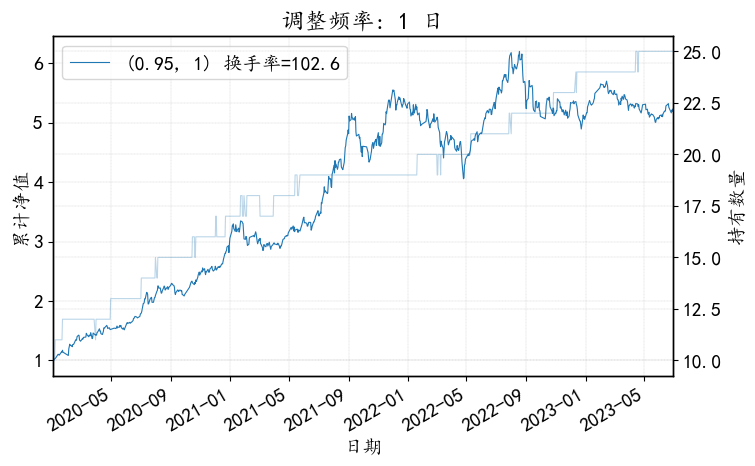

In [5]:
# 获得用于计算持仓、持仓权重、标的收益率的三张表
market_factor, market_price, market_return = alpha.get_market(market_convertible)

# 当日收盘价结算
price = market_price.pivot_table('close', 'date', 'code')
price_return = market_return.pivot_table('close', 'date', 'code')
# 因子区间与时间周期
divide = [(0.95,1)]
periods=(1,)
# 因子与回测
factor = alpha.Rank(-market_factor['premium'])
factor = pd.DataFrame(factor.rename('factor'))
pfl0 = alpha.Portfolio(factor, price, price_return)
pfl0.run(divide=divide, periods=periods, justdivide=True)
# 策略收益
pfl0.HoldReturn(0)

### 可以使用次日开盘价（alpha内部自动调整为次日，输入只需要输入当日开盘价）代替当日收盘价避免当日收盘价无法成交的问题，相当于每日收益率加了一个“随机”扰动

<Figure size 640x480 with 0 Axes>

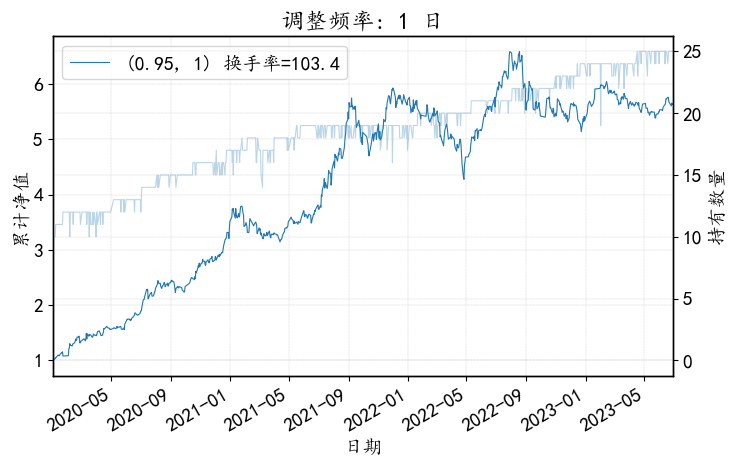

In [10]:
market_factor, market_price, market_return = alpha.get_market(market_convertible)

# 当日收盘价结算
price = market_price.pivot_table('open', 'date', 'code')
price_return = market_return.pivot_table('open', 'date', 'code')
# 因子区间与时间周期
divide = [(0.95,1)]
periods=(1,)
# 因子与回测
factor = alpha.Rank(-market_factor['premium'])
factor = pd.DataFrame(factor.rename('factor'))
pfl0 = alpha.Portfolio(factor, price, price_return, cheat=False)
pfl0.run(divide=divide, periods=periods, justdivide=True)
# 策略收益
pfl0.HoldReturn(0)

### 加入排除条件

<Figure size 640x480 with 0 Axes>

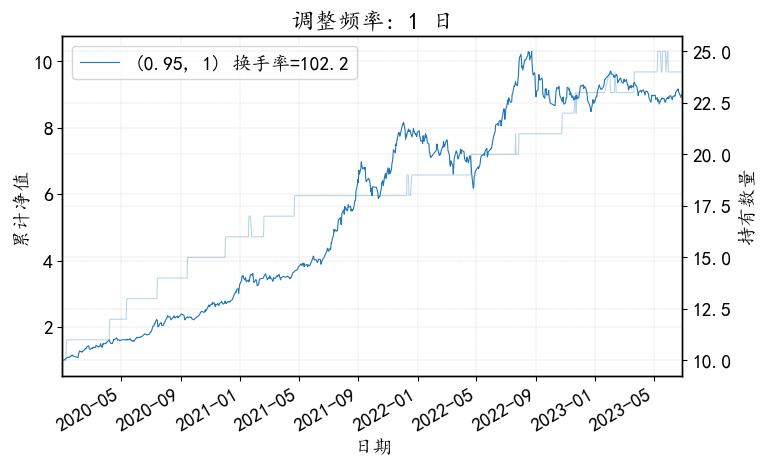

In [7]:
market_factor, market_price, market_return = alpha.get_market(market_)

# 当日收盘价结算
price = market_price.pivot_table('close', 'date', 'code')
price_return = market_return.pivot_table('close', 'date', 'code')
# 因子区间与时间周期
divide = [(0.95,1)]
periods=(1,)
# 因子与回测
factor = alpha.Rank(-market_factor['premium'])
factor = pd.DataFrame(factor.rename('factor'))
pfl0 = alpha.Portfolio(factor, price, price_return)
pfl0.run(divide=divide, periods=periods, justdivide=True)
# 策略收益
pfl0.HoldReturn(0)

# 计算因子分层收益 

<Figure size 640x480 with 0 Axes>

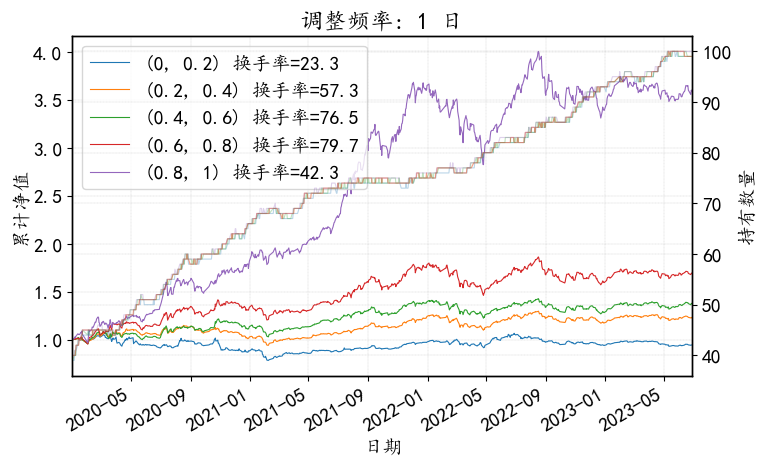

In [11]:
# 获得用于计算持仓、持仓权重、标的收益率的三张表
market_factor, market_price, market_return = alpha.get_market(market_convertible)

# 当日收盘价结算
price = market_price.pivot_table('close', 'date', 'code')
price_return = market_return.pivot_table('close', 'date', 'code')
# 因子区间与时间周期
divide = (0,0.2,0.4,0.6,0.8,1)
periods=(1,)
# 因子与回测
factor = alpha.Rank(-market_factor['premium'])
factor = pd.DataFrame(factor.rename('factor'))
pfl0 = alpha.Portfolio(factor, price, price_return)
pfl0.run(divide=divide, periods=periods, justdivide=True)
# 策略收益
pfl0.HoldReturn(0)